<a href="https://colab.research.google.com/github/Sujal-vajire/Machine-learning-models/blob/main/RNN_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, Bidirectional
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
data = pd.read_csv('dataset1.csv',)

In [7]:
data_sun = data[['UNIXTime','Radiation']].iloc[:31000,:]
data_sun.set_index('UNIXTime',drop=True,inplace=True)


In [8]:
MMS = MinMaxScaler()
data_sun[data_sun.columns] = MMS.fit_transform(data_sun)

In [9]:
training_size = round(len(data_sun) * 0.80)
train_data = data_sun[:training_size]
test_data  = data_sun[training_size:]

In [10]:
def create_sequence(dataset,sequence_len):
  sequences = []
  labels = []
  start_idx = 0
  for stop_idx in range(sequence_len,len(dataset)): 
    sequences.append(dataset.iloc[start_idx:stop_idx])
    labels.append(dataset.iloc[stop_idx])
    start_idx += 1
  return (np.array(sequences),np.array(labels))

In [11]:
X_train, y_train = create_sequence(train_data,100)
X_val, y_val = create_sequence(test_data,100)


In [12]:
model = Sequential()
model.add(LSTM(units = 64, return_sequences=True, input_shape = (X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.1)) 
model.add(LSTM(units = 32))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error'])

In [15]:
history = model.fit(X_train, y_train, epochs = 30, validation_data = (X_val, y_val), verbose = 1)

Epoch 1/30
589/589 [==============================] - 55s 93ms/step - loss: 0.0035 - mean_absolute_error: 0.0285 - val_loss: 0.0020 - val_mean_absolute_error: 0.0231
Epoch 2/30
589/589 [==============================] - 55s 94ms/step - loss: 0.0033 - mean_absolute_error: 0.0267 - val_loss: 0.0020 - val_mean_absolute_error: 0.0263
Epoch 3/30
589/589 [==============================] - 55s 94ms/step - loss: 0.0033 - mean_absolute_error: 0.0270 - val_loss: 0.0017 - val_mean_absolute_error: 0.0170
Epoch 4/30
589/589 [==============================] - 55s 93ms/step - loss: 0.0032 - mean_absolute_error: 0.0264 - val_loss: 0.0018 - val_mean_absolute_error: 0.0209
Epoch 5/30
589/589 [==============================] - 54s 92ms/step - loss: 0.0032 - mean_absolute_error: 0.0258 - val_loss: 0.0018 - val_mean_absolute_error: 0.0210
Epoch 6/30
589/589 [==============================] - 56s 95ms/step - loss: 0.0032 - mean_absolute_error: 0.0258 - val_loss: 0.0017 - val_mean_absolute_error: 0.0178
Epoc

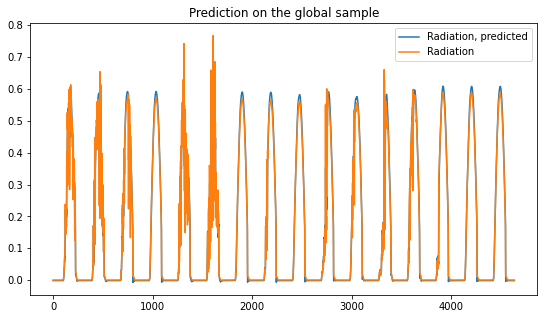

In [16]:
test_predicted = model.predict(X_val)

fig=plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.plot(test_predicted,label='Radiation, predicted')
plt.plot(y_val,label="Radiation")
plt.title('Prediction on the global sample')
plt.legend()

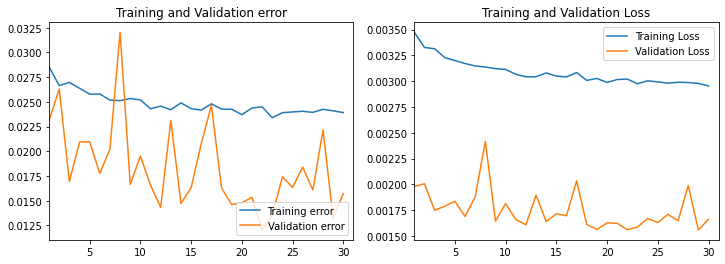

In [17]:
error = history.history['mean_absolute_error']
val_error = history.history['val_mean_absolute_error']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(1, len(val_error)+1)
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, error, label='Training error')
plt.plot(epochs_range, val_error, label='Validation error')
plt.legend(loc='lower right')
plt.xlim(1, len(val_error)+1)
plt.title('Training and Validation error')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.xlim(1, len(val_error)+1)
plt.title('Training and Validation Loss')
plt.show()

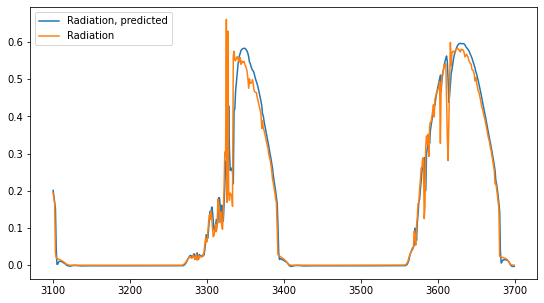

In [18]:
fig=plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.plot(np.arange(3100,3700),test_predicted[3100:3700],label='Radiation, predicted')
plt.plot(np.arange(3100,3700),y_val[3100:3700],label="Radiation")
plt.legend()

In [20]:
from sklearn import metrics
score = metrics.mean_squared_error(test_predicted,y_val)
print("Final score (MSE): {}".format(score))

Final score (MSE): 0.0016624739679632376


In [21]:
import numpy as np

# Measure RMSE error.  RMSE is common for regression.
score = np.sqrt(metrics.mean_squared_error(test_predicted,y_val))
print("Final score (RMSE): {}".format(score))

Final score (RMSE): 0.04077344684918406
